<a href="https://colab.research.google.com/github/Mounica-Sontenam/Mounica/blob/main/FoodOrderPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
data=pd.read_csv('/content/FoodOrder.csv')
data

,Age,Location,Average_Order_Value,Most_Ordered_Items,Time_of_Day,Browsing_History,Weather_Conditions
0,57,Rural,75.26,Burger,Afternoon,High,Cloudy
1,43,Rural,81.67,Burger,Night,Low,Cloudy
2,33,Rural,84.96,Pasta,Morning,Low,Snowy
3,45,Suburban,98.72,Sushi,Night,High,Rainy
4,18,Rural,81.22,Sushi,Night,Medium,Snowy
...,...,...,...,...,...,...,...
73,53,Rural,74.06,Burger,Morning,High,Rainy
74,38,Urban,90.85,Pasta,Evening,Low,Rainy
75,34,Urban,62.44,Sushi,Evening,Low,Rainy
76,50,Urban,21.17,Burger,Night,Medium,Rainy


In [24]:
data['Order'] = np.where(data['Average_Order_Value'] > 50, 'Ordered', 'Not Ordered')


In [25]:
data

,Age,Location,Average_Order_Value,Most_Ordered_Items,Time_of_Day,Browsing_History,Weather_Conditions,Order
0,57,Rural,75.26,Burger,Afternoon,High,Cloudy,Ordered
1,43,Rural,81.67,Burger,Night,Low,Cloudy,Ordered
2,33,Rural,84.96,Pasta,Morning,Low,Snowy,Ordered
3,45,Suburban,98.72,Sushi,Night,High,Rainy,Ordered
4,18,Rural,81.22,Sushi,Night,Medium,Snowy,Ordered
...,...,...,...,...,...,...,...,...
73,53,Rural,74.06,Burger,Morning,High,Rainy,Ordered
74,38,Urban,90.85,Pasta,Evening,Low,Rainy,Ordered
75,34,Urban,62.44,Sushi,Evening,Low,Rainy,Ordered
76,50,Urban,21.17,Burger,Night,Medium,Rainy,Not Ordered


In [26]:
label_encoders = {}
categorical_columns = ['Location', 'Most_Ordered_Items', 'Time_of_Day', 'Browsing_History', 'Weather_Conditions', 'Order']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [27]:
label_encoders

{'Location': LabelEncoder(),
 'Most_Ordered_Items': LabelEncoder(),
 'Time_of_Day': LabelEncoder(),
 'Browsing_History': LabelEncoder(),
 'Weather_Conditions': LabelEncoder(),
 'Order': LabelEncoder()}

In [28]:
X = data.drop('Order', axis=1)
y = data['Order']


In [10]:
X

,Age,Location,Average_Order_Value,Most_Ordered_Items,Time_of_Day,Browsing_History,Weather_Conditions
0,57,0,75.26,0,0,0,0
1,43,0,81.67,0,3,1,0
2,33,0,84.96,1,2,1,2
3,45,1,98.72,4,3,0,1
4,18,0,81.22,4,3,2,2
...,...,...,...,...,...,...,...
73,53,0,74.06,0,2,0,1
74,38,2,90.85,1,1,1,1
75,34,2,62.44,4,1,1,1
76,50,2,21.17,0,3,2,1


In [11]:
y

0     1
1     1
2     1
3     1
4     1
     ..
73    1
74    1
75    1
76    0
77    0
Name: Order, Length: 78, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
X_train

array([[-0.89947181, -1.24652511, -1.5290793 , -0.55449545,  0.40320579,
         0.01893545,  0.60805259],
       [ 0.9962988 , -1.24652511,  1.08759532, -1.19113838, -1.32084655,
        -1.15506275, -0.22970876],
       [ 0.0484135 ,  1.06047659,  0.69111747, -1.19113838, -1.32084655,
        -1.15506275, -1.0674701 ],
       [ 1.07528924,  1.06047659,  0.18028624,  0.08214747, -1.32084655,
        -1.15506275,  0.60805259],
       [ 1.15427969,  1.06047659,  1.41166254, -0.55449545, -1.32084655,
         0.01893545, -1.0674701 ],
       [ 1.31226057, -1.24652511, -0.277523  , -0.55449545,  0.40320579,
         1.19293366,  0.60805259],
       [-0.26754827,  1.06047659, -1.61296484, -0.55449545, -1.32084655,
         0.01893545,  1.44581394],
       [-1.68937623, -0.09302426,  1.55133986,  0.08214747,  1.26523196,
         0.01893545, -1.0674701 ],
       [-0.66250048,  1.06047659,  0.07740776,  0.7187904 ,  1.26523196,
        -1.15506275, -1.0674701 ],
       [ 1.47024145,  1.0604

In [32]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred = model.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)

In [35]:
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

Confusion Matrix:
[[7 0]
 [0 9]]


In [36]:
X_new = pd.DataFrame({
    'Age': [45, 30, 25],
    'Location': ['Suburban', 'Urban', 'Urban'],
    'Average_Order_Value': [98.72, 12.91, 22.97],
    'Most_Ordered_Items': ['Sushi', 'Pizza', 'Salad'],
    'Time_of_Day': ['Night', 'Afternoon', 'Night'],
    'Browsing_History': ['High', 'Medium', 'Medium'],
    'Weather_Conditions': ['Rainy', 'Snowy', 'Cloudy']
})

In [37]:
for column in categorical_columns[:-1]:  # Exclude the 'Order' column
    X_new[column] = label_encoders[column].transform(X_new[column])

In [38]:
X_new = scaler.transform(X_new)

In [39]:
predictions = model.predict(X_new)

# Decode the predictions back to original labels
decoded_predictions = label_encoders['Order'].inverse_transform(predictions)

# Display the predictions
for i, pred in enumerate(decoded_predictions):
    print(f"Prediction for sample {i+1}: {pred}")

Prediction for sample 1: Ordered
Prediction for sample 2: Not Ordered
Prediction for sample 3: Not Ordered


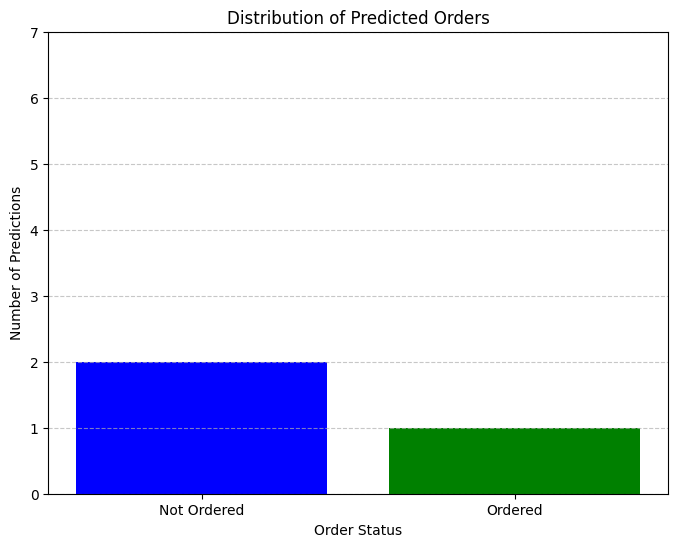

In [42]:
import matplotlib.pyplot as plt

# Assuming you have already made predictions and stored them in decoded_predictions

# Count the number of predictions for each class
unique_classes, counts = np.unique(decoded_predictions, return_counts=True)

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, counts, color=['blue', 'green'])  # Assuming 'Ordered' is encoded as 1 and 'Not Ordered' as 0
plt.xlabel('Order Status')
plt.ylabel('Number of Predictions')
plt.title('Distribution of Predicted Orders')
plt.xticks(unique_classes, ['Not Ordered', 'Ordered'])
plt.ylim(0, max(counts) + 5)  # Adjust ylim for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


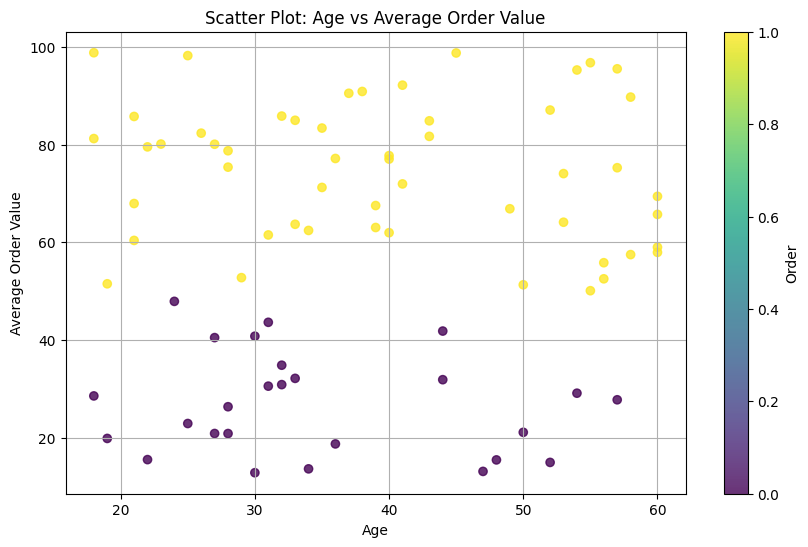

In [43]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Average_Order_Value'], c=data['Order'], cmap='viridis', alpha=0.8)
plt.colorbar(label='Order')
plt.xlabel('Age')
plt.ylabel('Average Order Value')
plt.title('Scatter Plot: Age vs Average Order Value')
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

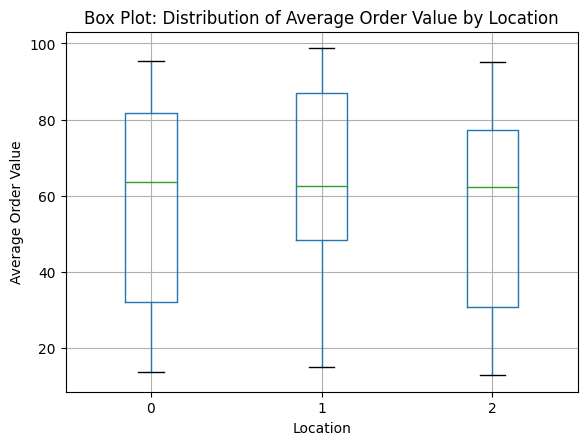

In [44]:
# Box plot
plt.figure(figsize=(10, 6))
data.boxplot(column='Average_Order_Value', by='Location', grid=True)
plt.xlabel('Location')
plt.ylabel('Average Order Value')
plt.title('Box Plot: Distribution of Average Order Value by Location')
plt.suptitle('')  # Remove default title
plt.show()


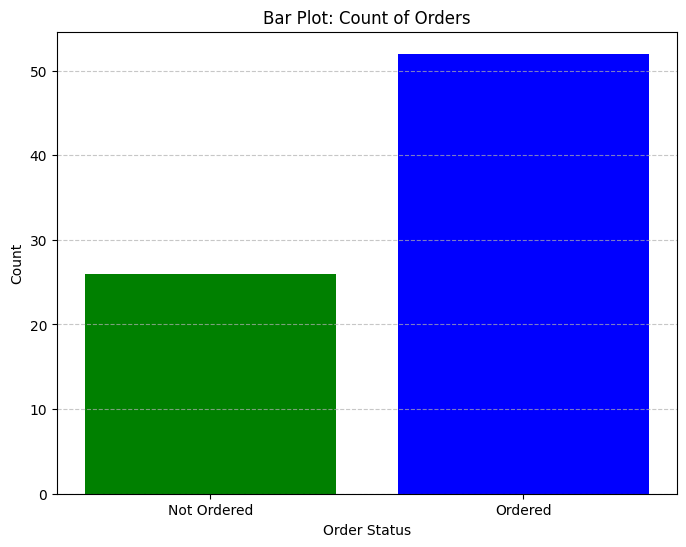

In [45]:
# Bar plot
plt.figure(figsize=(8, 6))
order_counts = data['Order'].value_counts()
plt.bar(order_counts.index, order_counts.values, color=['blue', 'green'])
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.title('Bar Plot: Count of Orders')
plt.xticks([0, 1], ['Not Ordered', 'Ordered'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [54]:
from sklearn.preprocessing import LabelEncoder

# Initialize a new LabelEncoder for 'Most_Ordered_Items'
item_label_encoder = LabelEncoder()

# Fit the LabelEncoder with the original categorical data
item_label_encoder.fit(['Burger', 'Burger', 'Pasta', 'Sushi', 'Pizza', 'Salad'])

# Inverse transform the encoded values back to original categorical labels
data['Most_Ordered_Items'] = item_label_encoder.inverse_transform(data['Most_Ordered_Items'])

# Display the first few rows to verify
print(data.head())


   Age  Location  Average_Order_Value Most_Ordered_Items  Time_of_Day  \
0   57         0                75.26             Burger            0   
1   43         0                81.67             Burger            3   
2   33         0                84.96              Pasta            2   
3   45         1                98.72              Sushi            3   
4   18         0                81.22              Sushi            3   

   Browsing_History  Weather_Conditions  Order  
0                 0                   0      1  
1                 1                   0      1  
2                 1                   2      1  
3                 0                   1      1  
4                 2                   2      1  


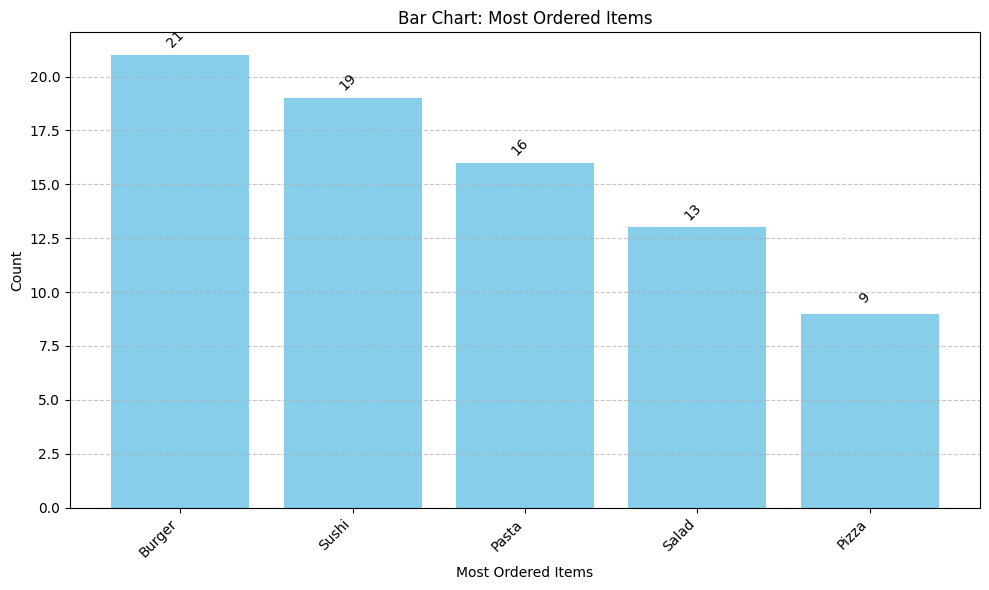

In [55]:
import matplotlib.pyplot as plt

# Count the occurrences of each item in 'Most_Ordered_Items'
item_counts = data['Most_Ordered_Items'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(item_counts.index, item_counts.values, color='skyblue')

# Adding labels with item names and counts above each bar
for bar, count in zip(bars, item_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{count}",
             ha='center', va='bottom', fontsize=10, rotation=45, wrap=True)

plt.xlabel('Most Ordered Items')
plt.ylabel('Count')
plt.title('Bar Chart: Most Ordered Items')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [56]:
# Count the occurrences of each item in 'Most_Ordered_Items'
item_counts = data['Most_Ordered_Items'].value_counts()

# Find the most ordered item (item with the highest count)
most_ordered_item = item_counts.idxmax()
count_most_ordered_item = item_counts.max()

print(f"The most ordered item is '{most_ordered_item}' with a count of {count_most_ordered_item}.")

The most ordered item is 'Burger' with a count of 21.


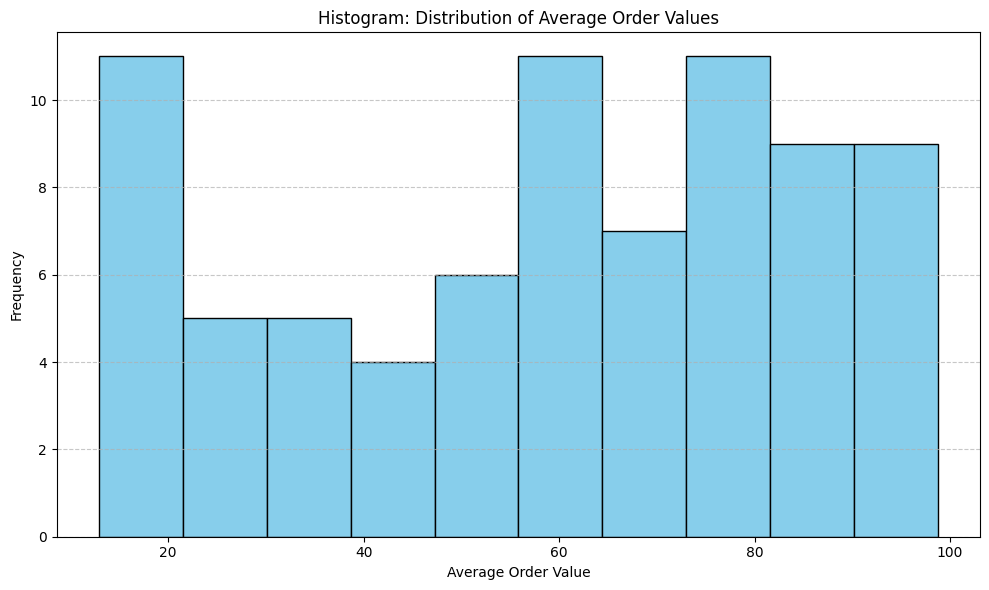

In [57]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Average_Order_Value'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Average Order Value')
plt.ylabel('Frequency')
plt.title('Histogram: Distribution of Average Order Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [59]:
# Example new data (replace with your actual new dataset)
X_new = pd.DataFrame({
    'Age': [35, 28, 42],
    'Location': ['Urban', 'Rural', 'Suburban'],
    'Average_Order_Value': [78.65, 45.32, 62.18],
    'Most_Ordered_Items': ['Pizza', 'Burger', 'Sushi'],
    'Time_of_Day': ['Morning', 'Afternoon', 'Night'],
    'Browsing_History': ['Low', 'High', 'Medium'],
    'Weather_Conditions': ['Cloudy', 'Rainy', 'Sunny']
})

# Encode categorical variables using previously fitted label encoders
for column in categorical_columns[:-1]:  # Exclude the 'Order' column
    X_new[column] = label_encoders[column].transform(X_new[column])

# Standardize the new data using previously fitted scaler
X_new = scaler.transform(X_new)

# Make predictions on the new data
predictions = model.predict(X_new)

# Decode the predictions back to original labels if needed
decoded_predictions = label_encoders['Order'].inverse_transform(predictions)

# Display the predictions
for i, pred in enumerate(decoded_predictions):
    print(f"Prediction for sample {i+1}: {pred}")


Prediction for sample 1: Ordered
Prediction for sample 2: Not Ordered
Prediction for sample 3: Ordered
